In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  

In [213]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [214]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[1 1 0 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 [1 1 0 ... 0 1 1]
 ...
 [1 0 1 ... 0 1 0]
 [0 1 1 ... 0 0 1]
 [0 0 0 ... 0 1 1]]


In [215]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [216]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [217]:
#def funcion(x):
    #return np.sum(x**2)
#def funcion(x,y):
     #return np.sum(x**2) # esfera
    #return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) #rosenbrock
 #   return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 #himmenblau

def funcion(x,y):
   term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
   term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
   return -(y + 47) * term1 - x * term2



In [218]:
def eva_funcion(ind, a, b, m, decimales):
    x,y = deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [219]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1
 1 1 0]
Fenotipo: [ 354.011 -148.298]
Evaluación f(x): -148.05596035265245

Individuo 2:
Genotipo: [1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 0]
Fenotipo: [ 136.935 -340.4  ]
Evaluación f(x): 61.49250182087391

Individuo 3:
Genotipo: [1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0
 0 1 1]
Fenotipo: [340.743 213.222]
Evaluación f(x): -394.7973397932701

Individuo 4:
Genotipo: [1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 0]
Fenotipo: [ 214.522 -389.043]
Evaluación f(x): 343.0007437399746

Individuo 5:
Genotipo: [1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 0]
Fenotipo: [ 124.62  -280.004]
Evaluación f(x): 103.77991147003257

Individuo 6:
Genotipo: [0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 1]
Fenotipo: [-282.823  358.015]
E

In [220]:
def SUS(pob, m, a, b, decimales, epsilon):
    aptitudes = []
    for ind in pob:
        f_val = eva_funcion(ind, m, a, b, decimales)
        aptitud = 1/(f_val + epsilon)  # función de evaluación de aptitud
        aptitudes.append(aptitud)
    aptitudes = np.array(aptitudes)
    
    total_aptitud = np.sum(aptitudes) # suma acumulada de aptitudes
    probas = aptitudes / total_aptitud
    
    
    acc_n = np.cumsum(probas) # acumulado de las sumas
    
    punto = 1.0 / pob_size
    t = np.random.rand() * punto
    pt = t +np.arange(pob_size) * punto

    selecto_index = []
    selecto_ind = []
    index = 0
    for punto in pt: # se va hasta el acumulado, cuando coincida con el punto
        
        while acc_n[index] < punto:
            index += 1
        selecto_index.append(index)
        selecto_ind.append(pob[index])
    
    return selecto_ind, selecto_index   

In [221]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [222]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [223]:
def AG_etapas_SUS(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.1 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            #if round(mejor_ahora, decimales) <= target:
            #    print("Se ha alcanzado el objetivo")
            #   return mejor_hijo, mejor_ahora, total_generacion, h, h_pp 
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            selecto_pob, _ = SUS(pob, m, a, b, decimales, epsilon)
        
            

            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                for i in range(0, pob_size, 2):
                   padre1 = selecto_pob[i]
                   padre2 = selecto_pob[i+1]
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: -737.137 | Promedio: -46.977
Generación 20 - Mejor: -737.137 | Promedio: -63.953
Generación 30 - Mejor: -737.137 | Promedio: -32.962
Generación 40 - Mejor: -737.137 | Promedio: -57.16
Generación 50 - Mejor: -737.137 | Promedio: -56.185
Generación 60 - Mejor: -737.137 | Promedio: -45.493
Generación 70 - Mejor: -737.137 | Promedio: -67.051
Generación 80 - Mejor: -737.137 | Promedio: -21.687
Generación 90 - Mejor: -737.137 | Promedio: -67.504
Generación 100 - Mejor: -737.137 | Promedio: -62.321
Fin de la Etapa 1: Mejor en etapa: -737.137 | Promedio etapa: -52.007

=== Etapa 2 ===
Generación 110 - Mejor: -737.137 | Promedio: -50.487
Generación 120 - Mejor: -737.137 | Promedio: -56.686
Generación 130 - Mejor: -737.137 | Promedio: -59.134
Generación 140 - Mejor: -737.137 | Promedio: -61.474
Generación 150 - Mejor: -737.137 | Promedio: -25.727
Generación 160 - Mejor: -737.137 | Promedio: -38.716
Generación 170 - Mejor: -737.137 | Promedio: -

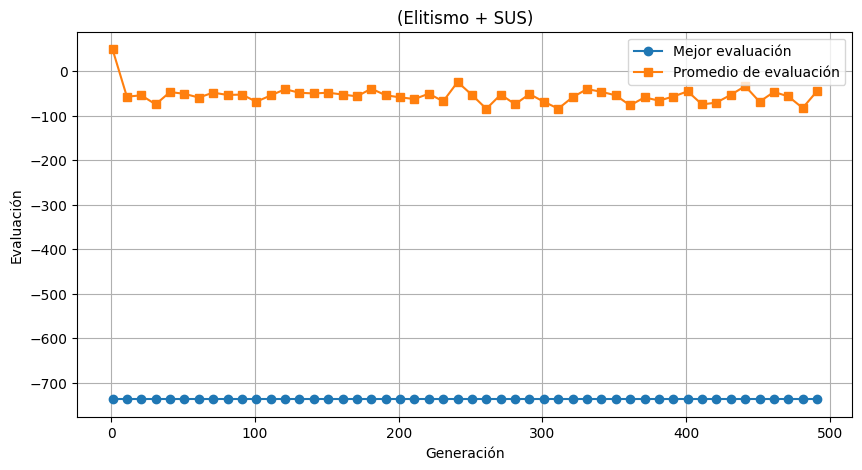

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: -704.971 | Promedio: -92.226
Generación 20 - Mejor: -705.645 | Promedio: -89.816
Generación 30 - Mejor: -705.645 | Promedio: -53.163
Generación 40 - Mejor: -705.645 | Promedio: -29.492
Generación 50 - Mejor: -705.645 | Promedio: -93.969
Generación 60 - Mejor: -705.645 | Promedio: -36.101
Generación 70 - Mejor: -705.645 | Promedio: -37.695
Generación 80 - Mejor: -705.645 | Promedio: -39.027
Generación 90 - Mejor: -705.645 | Promedio: -15.086
Generación 100 - Mejor: -705.645 | Promedio: -33.213
Fin de la Etapa 1: Mejor en etapa: -705.645 | Promedio etapa: -65.328

=== Etapa 2 ===
Generación 110 - Mejor: -705.645 | Promedio: -58.391
Generación 120 - Mejor: -705.645 | Promedio: -12.831
Generación 130 - Mejor: -705.645 | Promedio: -65.344
Generación 140 - Mejor: -705.645 | Promedio: -65.462
Generación 150 - Mejor: -705.645 | Promedio: -31.82
Generación 160 - Mejor: -705.645 | Promedio: -27.938
Generación 170 - Mejor: -705.645 | Promedio: -

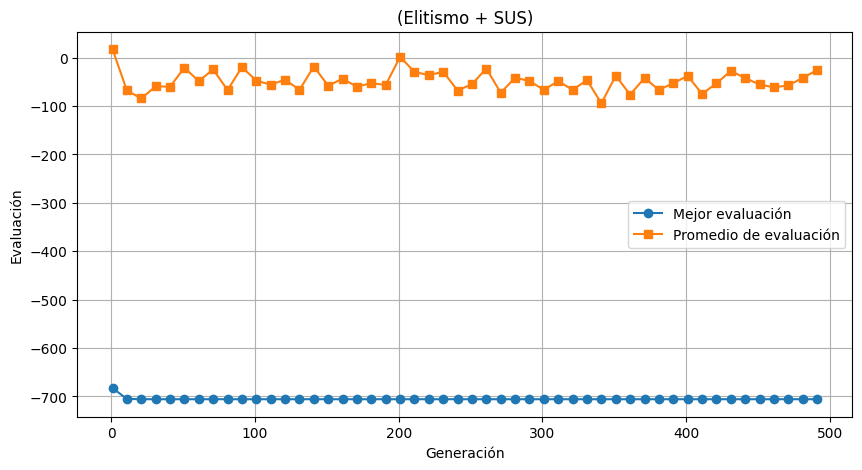

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: -900.948 | Promedio: -40.499
Generación 20 - Mejor: -900.948 | Promedio: -38.871
Generación 30 - Mejor: -900.948 | Promedio: -71.622
Generación 40 - Mejor: -900.948 | Promedio: -84.746
Generación 50 - Mejor: -900.948 | Promedio: -92.056
Generación 60 - Mejor: -900.948 | Promedio: -68.258
Generación 70 - Mejor: -900.948 | Promedio: -83.663
Generación 80 - Mejor: -900.948 | Promedio: -96.049
Generación 90 - Mejor: -900.948 | Promedio: -108.327
Generación 100 - Mejor: -900.948 | Promedio: -59.465
Fin de la Etapa 1: Mejor en etapa: -900.948 | Promedio etapa: -66.852

=== Etapa 2 ===
Generación 110 - Mejor: -900.948 | Promedio: -78.203
Generación 120 - Mejor: -900.948 | Promedio: -80.008
Generación 130 - Mejor: -900.948 | Promedio: -118.72
Generación 140 - Mejor: -900.948 | Promedio: -103.752
Generación 150 - Mejor: -900.948 | Promedio: -54.878
Generación 160 - Mejor: -900.948 | Promedio: -68.537
Generación 170 - Mejor: -900.948 | Promedio

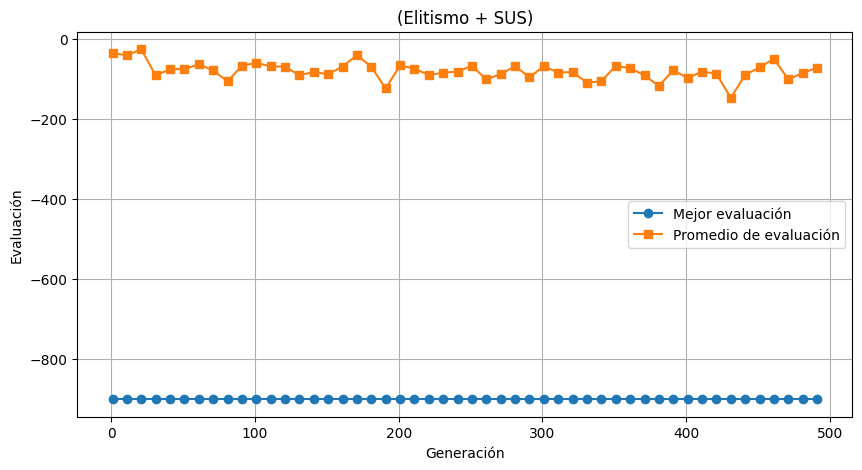

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: -769.275 | Promedio: -96.924
Generación 20 - Mejor: -769.275 | Promedio: -114.851
Generación 30 - Mejor: -769.275 | Promedio: -95.795
Generación 40 - Mejor: -769.275 | Promedio: -92.607
Generación 50 - Mejor: -769.275 | Promedio: -87.913
Generación 60 - Mejor: -769.275 | Promedio: -75.407
Generación 70 - Mejor: -769.275 | Promedio: -99.618
Generación 80 - Mejor: -769.275 | Promedio: -95.693
Generación 90 - Mejor: -769.275 | Promedio: -96.73
Generación 100 - Mejor: -769.275 | Promedio: -102.351
Fin de la Etapa 1: Mejor en etapa: -769.275 | Promedio etapa: -86.998

=== Etapa 2 ===
Generación 110 - Mejor: -769.275 | Promedio: -109.918
Generación 120 - Mejor: -769.275 | Promedio: -107.273
Generación 130 - Mejor: -769.275 | Promedio: -84.461
Generación 140 - Mejor: -769.275 | Promedio: -103.493
Generación 150 - Mejor: -769.275 | Promedio: -115.487
Generación 160 - Mejor: -769.275 | Promedio: -64.152
Generación 170 - Mejor: -769.275 | Prome

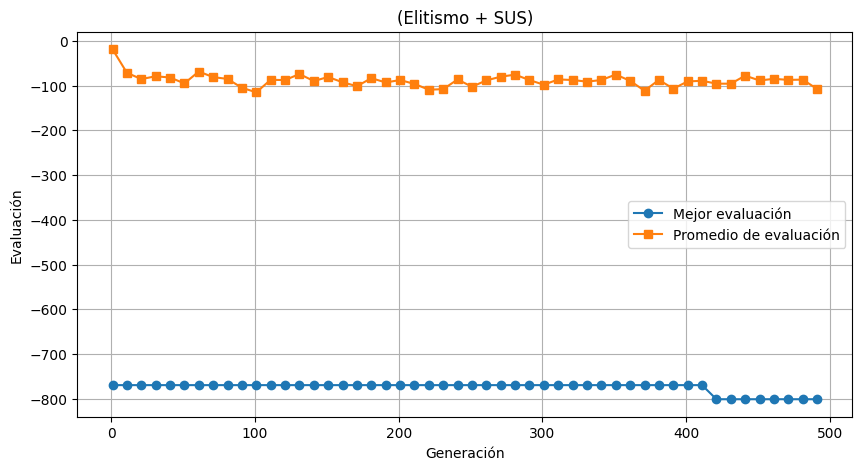

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: -805.801 | Promedio: -74.051
Generación 20 - Mejor: -805.801 | Promedio: -67.113
Generación 30 - Mejor: -805.801 | Promedio: -103.832
Generación 40 - Mejor: -805.801 | Promedio: -67.977
Generación 50 - Mejor: -805.801 | Promedio: -70.771
Generación 60 - Mejor: -805.801 | Promedio: -79.184
Generación 70 - Mejor: -805.801 | Promedio: -116.342
Generación 80 - Mejor: -805.801 | Promedio: -48.503
Generación 90 - Mejor: -805.801 | Promedio: -64.611
Generación 100 - Mejor: -805.801 | Promedio: -127.143
Fin de la Etapa 1: Mejor en etapa: -805.801 | Promedio etapa: -79.991

=== Etapa 2 ===
Generación 110 - Mejor: -805.801 | Promedio: -83.783
Generación 120 - Mejor: -805.801 | Promedio: -91.046
Generación 130 - Mejor: -805.801 | Promedio: -63.144
Generación 140 - Mejor: -805.801 | Promedio: -79.446
Generación 150 - Mejor: -805.801 | Promedio: -67.1
Generación 160 - Mejor: -805.801 | Promedio: -62.458
Generación 170 - Mejor: -805.801 | Promedio:

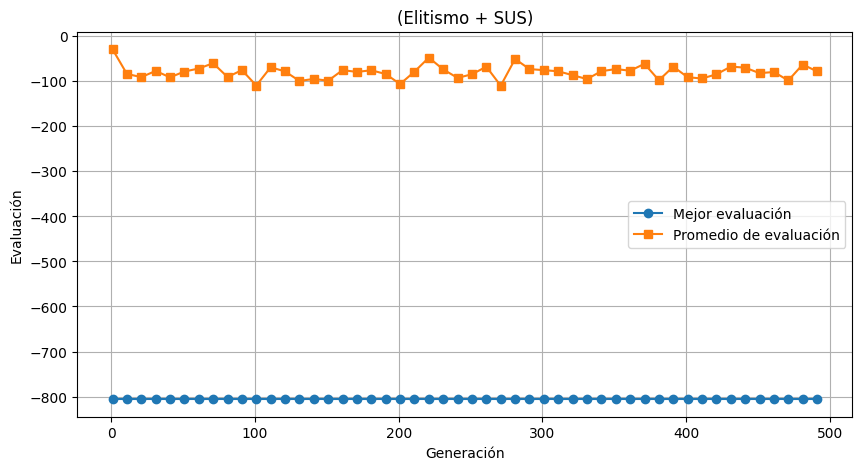

In [224]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_SUS(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Elitismo + SUS)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            